# Facebook Data Analysis

In this project we will do data analysis of facebook data and answer some questions.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# downloading the dataset
dataset_url = 'https://www.kaggle.com/sheenabatra/facebook-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

100%|█████████████████████████████████████████████████████████████████████████████| 1.82M/1.82M [00:00<00:00, 19.3MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './facebook-data'

In [5]:
import os
os.listdir(data_dir)

['pseudo_facebook.csv']

## Data Preparation and Cleaning




In [6]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [20]:
df = pd.read_csv('./facebook-data/pseudo_facebook.csv')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(99003, 15)

In [22]:
# columns
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,99003.0,1.597045e+06,344059.177464,1000008.0,1298805.5,1596148.0,1895744.0,2193542.0
age,99003.0,3.728022e+01,22.589748,13.0,20.0,28.0,50.0,113.0
dob_day,99003.0,1.453041e+01,9.015606,1.0,7.0,14.0,22.0,31.0
dob_year,99003.0,1.975720e+03,22.589748,1900.0,1963.0,1985.0,1993.0,2000.0
dob_month,99003.0,6.283365e+00,3.529672,1.0,3.0,6.0,9.0,12.0
tenure,99001.0,5.378874e+02,457.649874,0.0,226.0,412.0,675.0,3139.0
friend_count,99003.0,1.963508e+02,387.304229,0.0,31.0,82.0,206.0,4923.0
friendships_initiated,99003.0,1.074525e+02,188.786951,0.0,17.0,46.0,117.0,4144.0
likes,99003.0,1.560788e+02,572.280681,0.0,1.0,11.0,81.0,25111.0
likes_received,99003.0,1.426894e+02,1387.919613,0.0,1.0,8.0,59.0,261197.0


In [24]:
df['age'].value_counts()

18     5196
23     4404
19     4391
20     3769
21     3671
       ... 
87       42
112      18
111      18
110      15
109       9
Name: age, Length: 101, dtype: int64

In [25]:
df = pd.get_dummies(df,columns=['gender'])

In [26]:
df.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
0,2094382,14,19,1999,11,266.0,0,0,0,0,0,0,0,0,0,1
1,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0,1,0
2,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0,0,1
3,1203168,14,25,1999,12,93.0,0,0,0,0,0,0,0,0,1,0
4,1733186,14,4,1999,12,82.0,0,0,0,0,0,0,0,0,0,1


## Exploratory Analysis and Visualization

**Analysing facebook data visually**



In [29]:
# style
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (20,12)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**AGE ANALYSIS** - Exploring which age group uses more facebook comparatively.

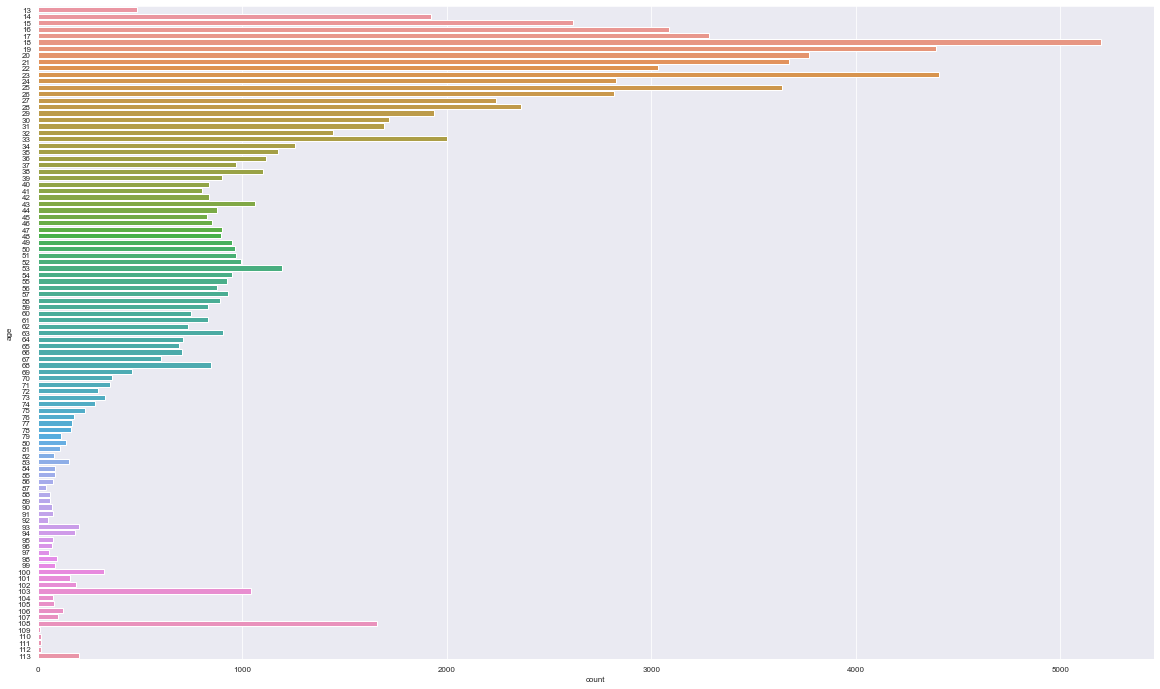

In [31]:
sns.countplot(y='age',data=df);

 we clearly see that teenagers are more using facebook comparatively to others.

**Likes analysis of according to gender and age** 

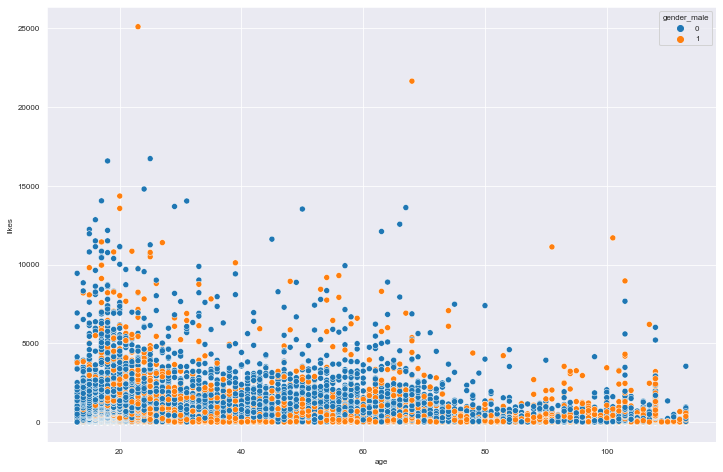

In [33]:
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(x="age", y="likes", hue="gender_male", data=df);

**Correlation data analysis**

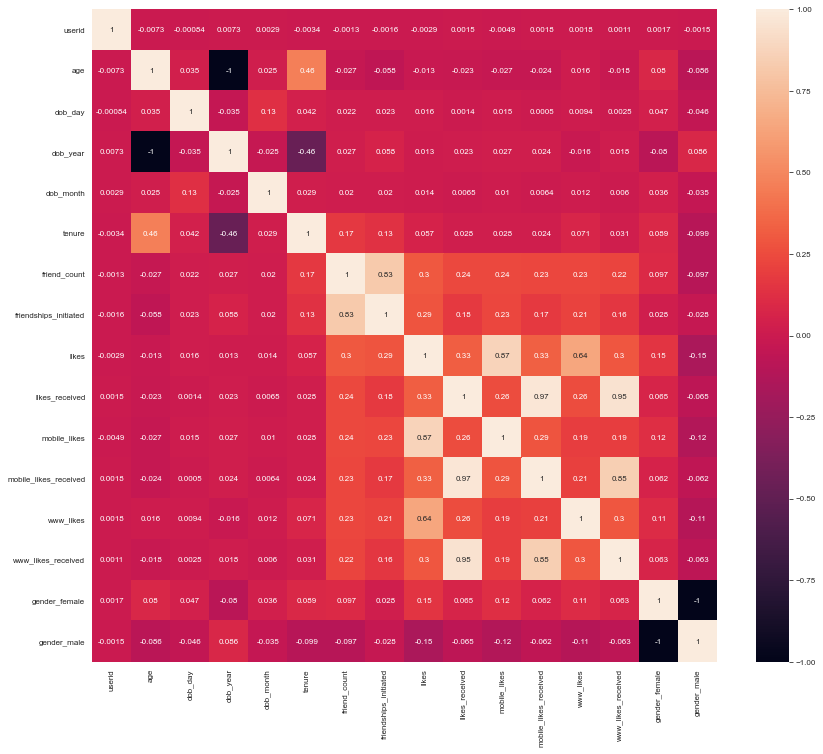

In [34]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot=True);

## Ask and Answer

#### Q1: Highest and the lowest number of likes noted from the dataset?

In [35]:
maximum_likes = df['likes'].max()
minimum_likes = df['likes'].min()

In [36]:
print("maximum likes:", maximum_likes)
print("minimum likes:", minimum_likes)

maximum likes: 25111
minimum likes: 0


From this we infer the maximum and the minimum likes noted.

#### Q2: Analyse which age group uses the mobile or the website through likes

In [37]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df.age, bins=np.arange(10, 121, 10), labels=labels, right=True)

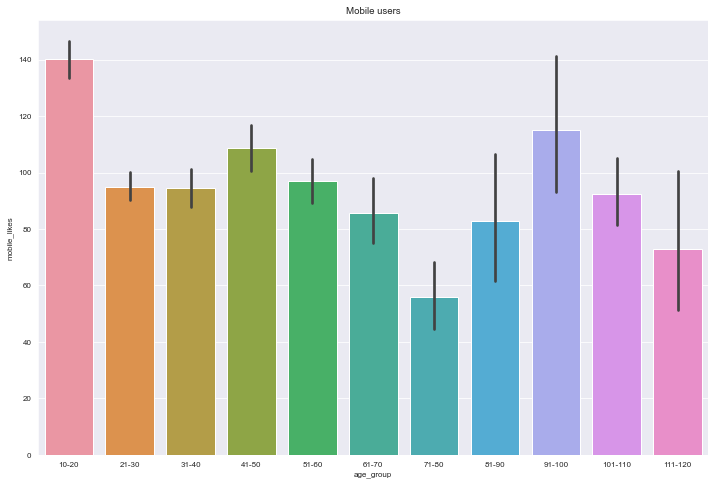

In [39]:
sns.barplot(df['age_group'], df['mobile_likes'])
plt.title("Mobile users");

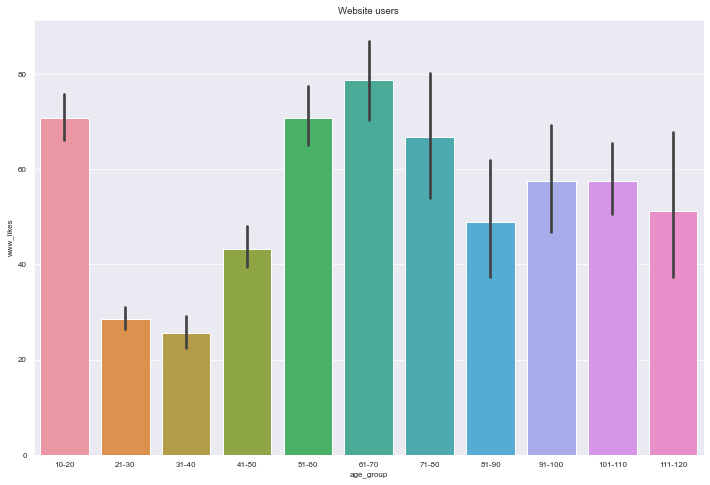

In [40]:
sns.barplot(df['age_group'], df['www_likes'])
plt.title("Website users");

From this we came to know about 51-70 age group uses website for using facebook and around age group between 10-20 uses the mobile app.

#### Q3: Analyse the friend count with reference to the age group

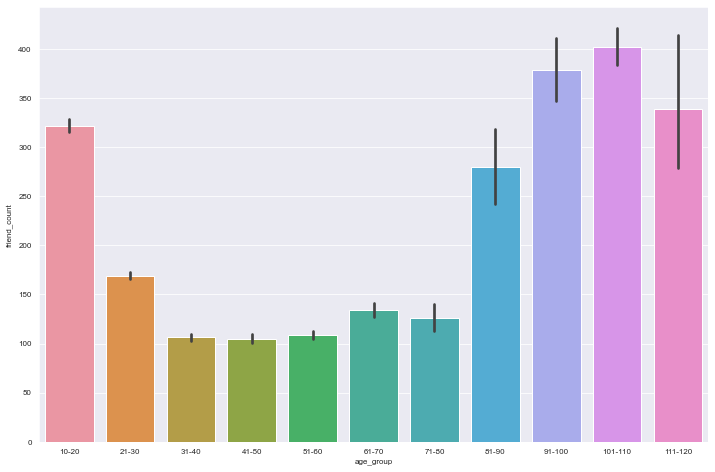

In [41]:
sns.barplot(df['age_group'], df['friend_count']);

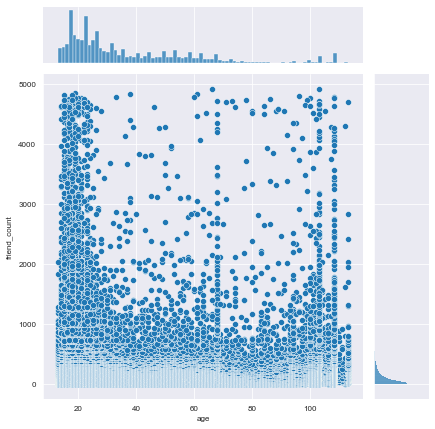

In [42]:
sns.jointplot(x='age', y='friend_count', data=df);

From this graph we conclude that more friends are counted for senior citizen i.e. age-gorup of above 80 or the youngsters and teenagers of age between 10-20

#### Q4: How many likes have being given in total? Also differentiate the likes given by males and females.

In [43]:
total_likes = df['likes'].sum()

In [44]:
print("Total number of likes over: ", total_likes)

Total number of likes over:  15452268


In [45]:
total_likes_male = df.groupby("gender_male")["likes"].sum()

In [46]:
total_likes_male

gender_male
0    10492345
1     4959923
Name: likes, dtype: int64

Here 0 shows number of likes given by males i.e. 10492345 and 1 represents the likes given by the females i.e. 4959923

#### Q5: Who has more number of friends males or females?

In [47]:
df_updated = pd.read_csv('./facebook-data/pseudo_facebook.csv')

In [48]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df_updated['age_group'] = pd.cut(df_updated.age, bins=np.arange(10, 121, 10), labels=labels, right=True)

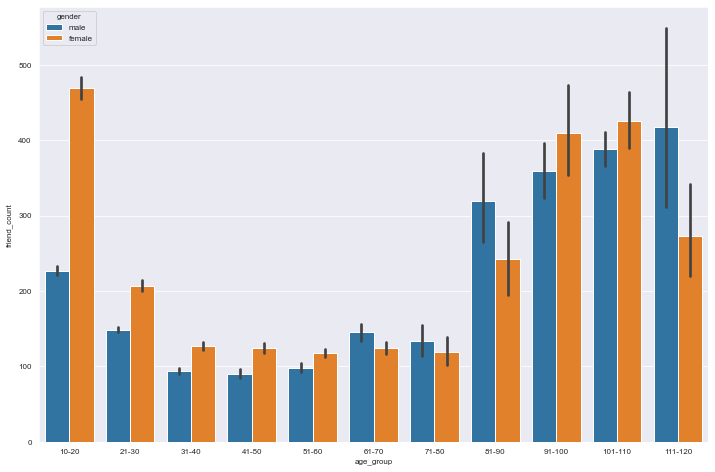

In [49]:
sns.barplot(x=df_updated['age_group'], y=df_updated['friend_count'], hue=df_updated.gender);

This shows females have more friends than males

## Inferences and Conclusion

* We studied the insight of the facebook data through visualization and data
* By answering questions we know that how peoples are using facebook.